<a href="https://colab.research.google.com/github/kvcli/Alzheimer_Disease_Prediction_Tool/blob/main/Alzheimer_Disease_Prediction_Tool.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Importing the dataset

In [ ]:
dataset = pd.read_csv('/content/alzheimers_disease_data.csv')

In [ ]:
dataset.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Droping confidiential variables (Doctor in charge) and patient ID (unncessary)

In [ ]:
dataset.drop(['DoctorInCharge', 'PatientID'], axis=1, inplace=True)

In [ ]:
dataset.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [ ]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

## Training XGBoost on the Training set

In [ ]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[260   7]
 [ 12 151]]


0.9558139534883721

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.18 %
Standard Deviation: 1.88 %


# Hyperparameter tuning
Perform hyperparameter tuning on the existing `XGBClassifier` using `GridSearchCV`. Define a grid of hyperparameters including `n_estimators`, `max_depth`, `learning_rate`, and `gamma`. Train the `XGBClassifier` with the best parameters found on the training data (`X_train`, `y_train`), then evaluate its performance on the test set (`X_test`, `y_test`) by computing and printing the accuracy score and confusion matrix. Finally, summarize the hyperparameter tuning process, the best parameters found, and the accuracy of the tuned model.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2]
}
print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'n_estimators': [100, 200, 300], 'max_depth': [3, 5, 7], 'learning_rate': [0.01, 0.1, 0.2], 'gamma': [0, 0.1, 0.2]}


## Perform Grid Search Cross-Validation

Use `GridSearchCV` to systematically search through the defined hyperparameter grid. This will involve training multiple XGBoost models with different combinations of hyperparameters and evaluating them using cross-validation on the training set (X_train, y_train).


In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = param_grid,
                           cv = 5,
                           scoring = 'accuracy',
                           n_jobs = -1) # Use all available cores

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters found:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters found: {'gamma': 0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.9464726422130315


## Train and Evaluate the Tuned Model


#### Steps:
1. Retrieve the best estimator from the `grid_search` object using `.best_estimator_`.
2. Use this `best_classifier` to make predictions on the test set (`X_test`).
3. Calculate the accuracy score of the `best_classifier`'s predictions on `y_test`.
4. Calculate the confusion matrix for the `best_classifier`'s predictions against `y_test`.
5. Print both the accuracy score and the confusion matrix.

In [ ]:
best_classifier = grid_search.best_estimator_
y_pred_tuned = best_classifier.predict(X_test)

cm_tuned = confusion_matrix(y_test, y_pred_tuned)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)

print("Confusion Matrix for Tuned Model:\n", cm_tuned)
print("Accuracy Score for Tuned Model: {:.4f}".format(accuracy_tuned))

Confusion Matrix for Tuned Model:
 [[262   5]
 [ 10 153]]
Accuracy Score for Tuned Model: 0.9651


## Summary of Hyperparameter Tuning

The hyperparameter tuning process for the XGBoost classifier involved using `GridSearchCV` to explore a predefined grid of hyperparameters, including `n_estimators`, `max_depth`, `learning_rate`, and `gamma`. The `GridSearchCV` was configured with 5-fold cross-validation and aimed to optimize for accuracy.

After systematically evaluating various combinations, the best parameters found by `GridSearchCV` were:
- `gamma`: 0
- `learning_rate`: 0.1
- `max_depth`: 3
- `n_estimators`: 100

The best cross-validation accuracy achieved during the grid search was approximately **0.9465**.

Subsequently, a new XGBoost model was trained using these optimal hyperparameters. When evaluated on the unseen test set, this tuned model achieved an accuracy score of **0.9651** and produced the following confusion matrix:
```
[[262   5]
 [ 10 153]]
```
This indicates a slight improvement in test set accuracy compared to the initial model, demonstrating the effectiveness of hyperparameter tuning.

## Visualize Model Performance Comparison

To effectively understand the impact of hyperparameter tuning, we will visualize and compare the performance of the original XGBoost model against the tuned model.

### Comparison Points:
1.  **Confusion Matrices**: Side-by-side display of the confusion matrices to highlight changes in true positives, true negatives, false positives, and false negatives.
2.  **Accuracy Scores**: A clear comparison of the accuracy scores achieved by both models on the test set.


## Visualize Model Predictions (ROC Curve)

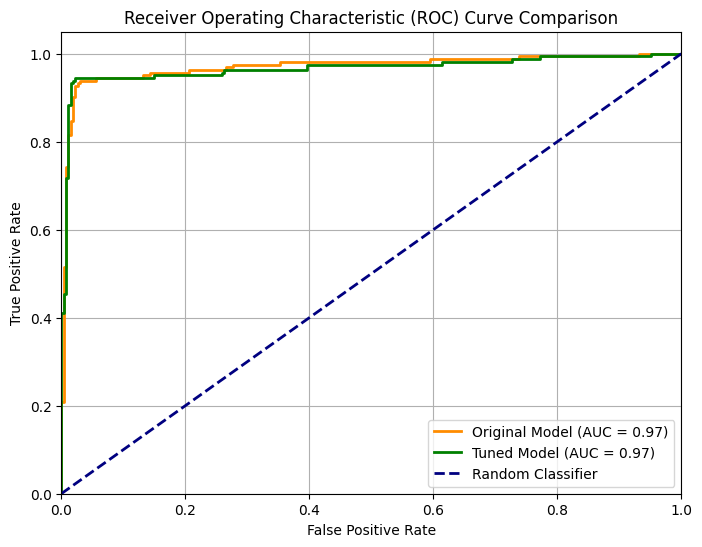


AUC for Original Model: 0.9713
AUC for Tuned Model: 0.9672


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class (class 1) for original model
y_prob_original = classifier.predict_proba(X_test)[:, 1]

# Get predicted probabilities for the positive class (class 1) for tuned model
y_prob_tuned = best_classifier.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for original model
fpr_original, tpr_original, _ = roc_curve(y_test, y_prob_original)
roc_auc_original = auc(fpr_original, tpr_original)

# Calculate ROC curve and AUC for tuned model
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_prob_tuned)
roc_auc_tuned = auc(fpr_tuned, tpr_tuned)

# Plotting the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_original, tpr_original, color='darkorange', lw=2, label=f'Original Model (AUC = {roc_auc_original:.2f})')
plt.plot(fpr_tuned, tpr_tuned, color='green', lw=2, label=f'Tuned Model (AUC = {roc_auc_tuned:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"\nAUC for Original Model: {roc_auc_original:.4f}")
print(f"AUC for Tuned Model: {roc_auc_tuned:.4f}")


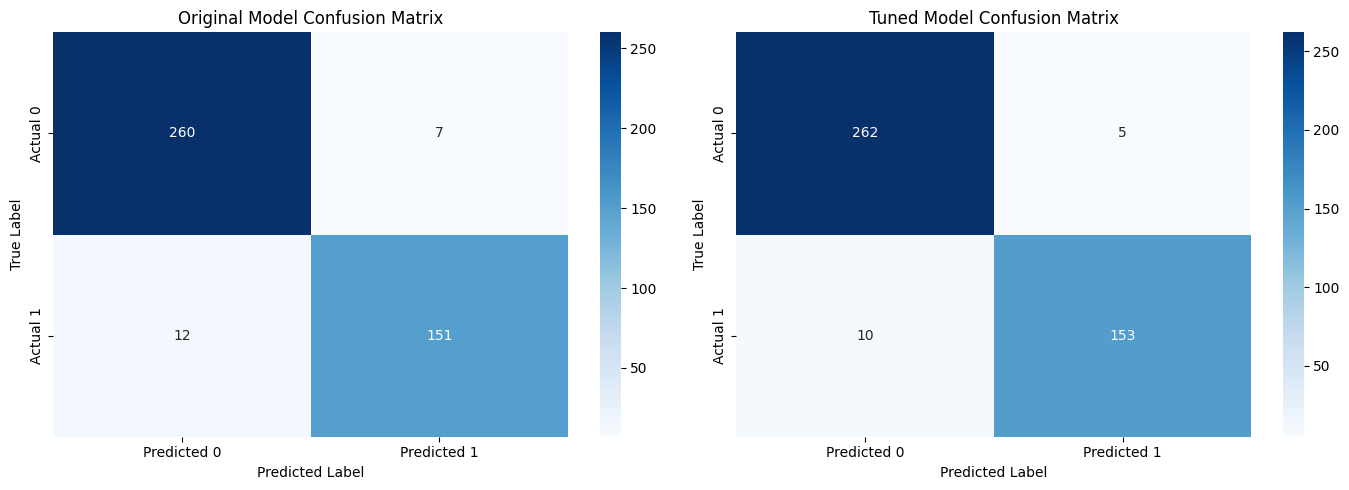


Original Model Accuracy: 0.9558
Tuned Model Accuracy: 0.9651


/tmp/ipython-input-3037414017.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=accuracies, palette='viridis')


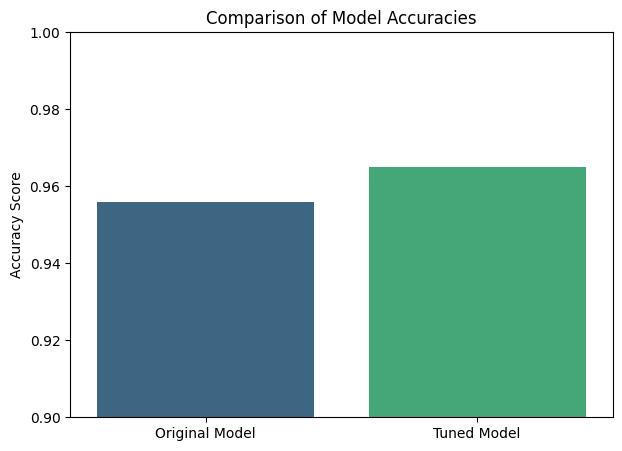

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Get accuracy for the original model
original_accuracy = accuracy_score(y_test, y_pred)

# Create a figure with two subplots for confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot Confusion Matrix for Original Model
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
axes[0].set_title('Original Model Confusion Matrix')
axes[0].set_xlabel('Predicted Label')
axes[0].set_ylabel('True Label')

# Plot Confusion Matrix for Tuned Model
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[1],
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
axes[1].set_title('Tuned Model Confusion Matrix')
axes[1].set_xlabel('Predicted Label')
axes[1].set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print accuracy scores for comparison
print(f"\nOriginal Model Accuracy: {original_accuracy:.4f}")
print(f"Tuned Model Accuracy: {accuracy_tuned:.4f}")

# Visualize accuracy comparison with a bar chart
labels = ['Original Model', 'Tuned Model']
accuracies = [original_accuracy, accuracy_tuned]

plt.figure(figsize=(7, 5))
sns.barplot(x=labels, y=accuracies, palette='viridis')
plt.ylim(0.9, 1.0) # Set y-axis limits to better show differences
plt.title('Comparison of Model Accuracies')
plt.ylabel('Accuracy Score')
plt.show()


# Selecting the  most impactful features
Extract feature importances from the `best_classifier` and map them to their original feature names.

In [ ]:
feature_importances = best_classifier.feature_importances_
print("Feature Importances extracted.")

Feature Importances extracted.


In [ ]:
feature_names = dataset.iloc[:, :-1].columns
print("Feature names retrieved.")

Feature names retrieved.



### Creating a pandas DataFrame that combines the feature names and their corresponding importance scores, then sort them in descending order.



In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature importances combined and sorted:")
print(feature_importance_df.head())


Feature importances combined and sorted:
                 Feature  Importance
22                  MMSE    0.154138
26                   ADL    0.148075
23  FunctionalAssessment    0.135865
24      MemoryComplaints    0.128352
25    BehavioralProblems    0.096822


## Visualize Top Features


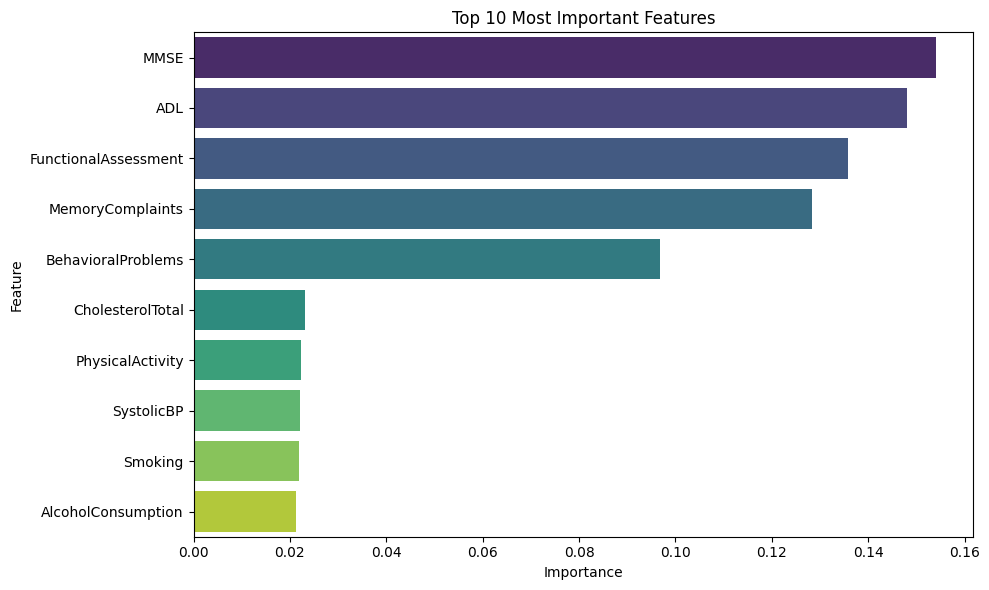

Bar chart of top 10 most important features displayed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 most important features
top_10_features = feature_importance_df.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## Prepare Dataset with Selected Features

### Subtask:
Filter the original dataset (`dataset`) to include only the 10 most impactful features identified previously (`MMSE`, `ADL`, `FunctionalAssessment`, `MemoryComplaints`, `BehavioralProblems`, `CholesterolTotal`, `PhysicalActivity`, `SystolicBP`, `Smoking`, `AlcoholConsumption`) and the target variable (`Diagnosis`). Then, separate these into new feature (X_filtered) and target (y) sets.


In [ ]:
selected_features = ['MMSE', 'ADL', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'CholesterolTotal', 'PhysicalActivity', 'SystolicBP', 'Smoking', 'AlcoholConsumption']
selected_features.append('Diagnosis')

print("Selected features list created:", selected_features)

Selected features list created: ['MMSE', 'ADL', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'CholesterolTotal', 'PhysicalActivity', 'SystolicBP', 'Smoking', 'AlcoholConsumption', 'Diagnosis']



Now that the list of selected features is defined, I will filter the original `dataset` to create `filtered_dataset` containing only these features and the target variable.



In [ ]:
filtered_dataset = dataset[selected_features]
print("Filtered dataset created. First 5 rows:")
print(filtered_dataset.head())

Filtered dataset created. First 5 rows:
        MMSE       ADL  FunctionalAssessment  MemoryComplaints  \
0  21.463532  1.725883              6.518877                 0   
1  20.613267  2.592424              7.118696                 0   
2   7.356249  7.119548              5.895077                 0   
3  13.991127  6.481226              8.965106                 0   
4  13.517609  0.014691              6.045039                 0   

   BehavioralProblems  CholesterolTotal  PhysicalActivity  SystolicBP  \
0                   0        242.366840          6.327112         142   
1                   0        231.162595          7.619885         115   
2                   0        284.181858          7.844988          99   
3                   1        159.582240          8.428001         118   
4                   0        237.602184          6.310461          94   

   Smoking  AlcoholConsumption  Diagnosis  
0        0           13.297218          0  
1        0            4.542524      

Separating the `filtered_dataset` into features `X_filtered` (all columns except 'Diagnosis') and the target variable `y_filtered` (the 'Diagnosis' column).



In [ ]:
X_filtered = filtered_dataset.drop('Diagnosis', axis=1)
y_filtered = filtered_dataset['Diagnosis']

print("X_filtered (features) created. First 5 rows:")
print(X_filtered.head())
print("\ny_filtered (target) created. First 5 values:")
print(y_filtered.head())

X_filtered (features) created. First 5 rows:
        MMSE       ADL  FunctionalAssessment  MemoryComplaints  \
0  21.463532  1.725883              6.518877                 0   
1  20.613267  2.592424              7.118696                 0   
2   7.356249  7.119548              5.895077                 0   
3  13.991127  6.481226              8.965106                 0   
4  13.517609  0.014691              6.045039                 0   

   BehavioralProblems  CholesterolTotal  PhysicalActivity  SystolicBP  \
0                   0        242.366840          6.327112         142   
1                   0        231.162595          7.619885         115   
2                   0        284.181858          7.844988          99   
3                   1        159.582240          8.428001         118   
4                   0        237.602184          6.310461          94   

   Smoking  AlcoholConsumption  
0        0           13.297218  
1        0            4.542524  
2        0          

## Split Filtered Dataset


In [ ]:
from sklearn.model_selection import train_test_split
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(X_filtered, y_filtered, test_size = 0.2, random_state = 0)

Dataset split into training and testing sets:
X_train_filtered shape: (1719, 10)
X_test_filtered shape: (430, 10)
y_train_filtered shape: (1719,)
y_test_filtered shape: (430,)


## Train New XGBoost Model on the selected features

In [ ]:
from xgboost import XGBClassifier

# Instantiate a new XGBClassifier
filtered_classifier = XGBClassifier()

# Train the new classifier on the filtered training data
filtered_classifier.fit(X_train_filtered, y_train_filtered)

print("New XGBoost classifier trained on filtered data.")

New XGBoost classifier trained on filtered data.


## Evaluate New Model Performance


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Make predictions on the filtered test set
y_pred_filtered = filtered_classifier.predict(X_test_filtered)

# Calculate the confusion matrix
cm_filtered = confusion_matrix(y_test_filtered, y_pred_filtered)

# Calculate the accuracy score
accuracy_filtered = accuracy_score(y_test_filtered, y_pred_filtered)

# Print the confusion matrix and accuracy score
print("Confusion Matrix for Filtered Model:\n", cm_filtered)
print("Accuracy Score for Filtered Model: {:.4f}".format(accuracy_filtered))

Confusion Matrix for Filtered Model:
 [[262   5]
 [ 13 150]]
Accuracy Score for Filtered Model: 0.9581


## Save New Model for Deployment


To save the newly trained model for deployment in the Streamlit application, I will use `joblib.dump()` to serialize the `filtered_classifier` object to a file named 'filtered_classifier_model.joblib'.



In [ ]:
import joblib

# Save the filtered_classifier model to a file
joblib.dump(filtered_classifier, 'alzheimer_predcition_tool.joblib')
print("Filtered model saved as alzheimer_predcition_tool.joblib")

Filtered model saved as filtered_classifier_model.joblib


## Creating the Streamlit app

In [33]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib



# -------------------------
# Load model
# -------------------------
try:
    model = joblib.load('alzheimer_predcition_tool.joblib')
except FileNotFoundError:
    st.error("Error: Model file 'alzheimer_predcition_tool.joblib' not found.")
    st.stop()

# -------------------------
# Human-friendly feature names
# -------------------------
display_names = {
    'MMSE': 'Mini-Mental State Examination (MMSE)',
    'ADL': 'Activities of Daily Living (ADL)',
    'FunctionalAssessment': 'Functional Assessment Score',
    'MemoryComplaints': 'Memory Complaints',
    'BehavioralProblems': 'Behavioral Problems',
    'CholesterolTotal': 'Total Cholesterol (mg/dL)',
    'PhysicalActivity': 'Physical Activity Level',
    'SystolicBP': 'Systolic Blood Pressure (mmHg)',
    'Smoking': 'Smoking Status',
    'AlcoholConsumption': 'Alcohol Consumption'
}

feature_names = list(display_names.keys())

# -------------------------
# Page title
# -------------------------
st.title("🧠 Alzheimer’s Disease Prediction Tool")
st.markdown("Provide the patient's information to estimate likelihood of Alzheimer's disease.")

# -------------------------
# Model accuracy / info block
# -------------------------
with st.expander("📊 Model Performance & Information"):
    st.markdown("""
    **Model accuracy:** 95.81%
    **Model type:** XGBoost Classifier
    **Training dataset size:** 2,150 samples
    **Selected features:** 10 clinically relevant predictors

    This model predicts the *likelihood of cognitive impairment consistent with Alzheimer's disease*.
    It is **not a medical diagnosis** and should be used for educational purposes only.
    """)

# -------------------------
# Default values & ranges
# -------------------------
default_values = {
    'MMSE': 25.0,
    'ADL': 5.0,
    'FunctionalAssessment': 5.0,
    'MemoryComplaints': 0,
    'BehavioralProblems': 0,
    'CholesterolTotal': 200.0,
    'PhysicalActivity': 5.0,
    'SystolicBP': 120.0,
    'Smoking': 0,
    'AlcoholConsumption': 0
}

feature_ranges = {
    'MMSE': (0.0, 30.0),
    'ADL': (0.0, 10.0),
    'FunctionalAssessment': (0.0, 10.0),
    'CholesterolTotal': (100.0, 300.0),
    'PhysicalActivity': (0.0, 10.0),
    'SystolicBP': (90.0, 200.0)
}

binary_features = ['MemoryComplaints', 'BehavioralProblems', 'Smoking', 'AlcoholConsumption']

input_data = {}

# -------------------------
# Input fields (clean labels)
# -------------------------
st.subheader("📥 Patient Inputs")

for feature in feature_names:
    label = display_names[feature]

    if feature in binary_features:
        input_data[feature] = st.selectbox(
            label,
            options=[0, 1],
            index=default_values[feature],
            format_func=lambda x: "Yes" if x == 1 else "No"
        )
    else:
        min_val, max_val = feature_ranges.get(feature, (0.0, 1000.0))
        input_data[feature] = st.number_input(
            label,
            min_value=min_val,
            max_value=max_val,
            value=default_values.get(feature, (min_val + max_val) / 2),
            step=0.1
        )

# -------------------------
# Predict button
# -------------------------
if st.button("🔍 Predict"):
    input_df = pd.DataFrame([input_data], columns=feature_names)
    prediction = model.predict(input_df)[0]

    # Styled output box
    if prediction == 1:
        st.markdown(
            """
            <div style="padding:15px; background-color:#ffe6e6; border-left:5px solid #cc0000; border-radius:5px;">
                <h3 style="color:#cc0000;">⚠️ High Likelihood of Alzheimer’s</h3>
                <p style="color:#cc0000;">This result suggests cognitive impairment consistent with Alzheimer's disease.</p>
            </div>
            """,
            unsafe_allow_html=True
        )
    else:
        st.markdown(
            """
            <div style="padding:15px; background-color:#e6ffe6; border-left:5px solid #009933; border-radius:5px;">
                <h3 style="color:#009933;">✔️ Low Likelihood of Alzheimer’s</h3>
                <p style="color:#009933;">The model predicts the patient is unlikely to have Alzheimer's disease.</p>
            </div>
            """,
            unsafe_allow_html=True
        )


# -------------------------
# Footer
# -------------------------
st.markdown(
    """
    <style>
        .footer-container {
            position: fixed;
            bottom: 0;
            left: 0;
            width: 100%;
            padding: 12px;
            backdrop-filter: blur(8px);
            background: rgba(255, 255, 255, 0.55);
            border-top: 1px solid rgba(200, 200, 200, 0.35);
            text-align: center;
            font-size: 15px;
            z-index: 9999;
        }

        /* Dark mode footer */
        body[data-theme="dark"] .footer-container {
            background: rgba(20, 20, 20, 0.65);
            border-top: 1px solid rgba(80, 80, 80, 0.6);
            color: white !important;
        }

        .footer-container a {
            margin: 0 10px;
            color: #0077cc;
            text-decoration: none;
            font-weight: 600;
        }
        .footer-container a:hover {
            text-decoration: underline;
        }

        .footer-icons img {
            width: 22px;
            margin-left: 6px;
            vertical-align: middle;
        }
    </style>

    <div class="footer-container">
        Made with ❤️ by <strong>Abdulaziz Aljaadi</strong>
        <div class="footer-icons">
            <a href="https://github.com/kvcli" target="_blank">
                GitHub <img src="https://cdn.jsdelivr.net/gh/devicons/devicon/icons/github/github-original.svg">
            </a>
            |
            <a href="https://www.linkedin.com/in/abdulaziz-aljaadi" target="_blank">
                LinkedIn <img src="https://th.bing.com/th/id/R.1307a2648e71d531704a0f5a270ea966?rik=UK6a6u%2fILSTfCg&pid=ImgRaw&r=0">
            </a>
            |
            <a href="https://devthoughtsbyaziz.vercel.app" target="_blank">
                Portfolio <img src="https://icon-library.com/images/website-icon-vector/website-icon-vector-8.jpg">
            </a>
        </div>
    </div>
    """,
    unsafe_allow_html=True
)

Overwriting app.py


##The model is deployed!
**You can accesss the model live** [Here](https://devthoughtsbyaziz-ml-alzaheimer-detector-tool.streamlit.app/)